<a href="https://colab.research.google.com/github/Mohanasandhya1234/FMML-lab/blob/main/M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

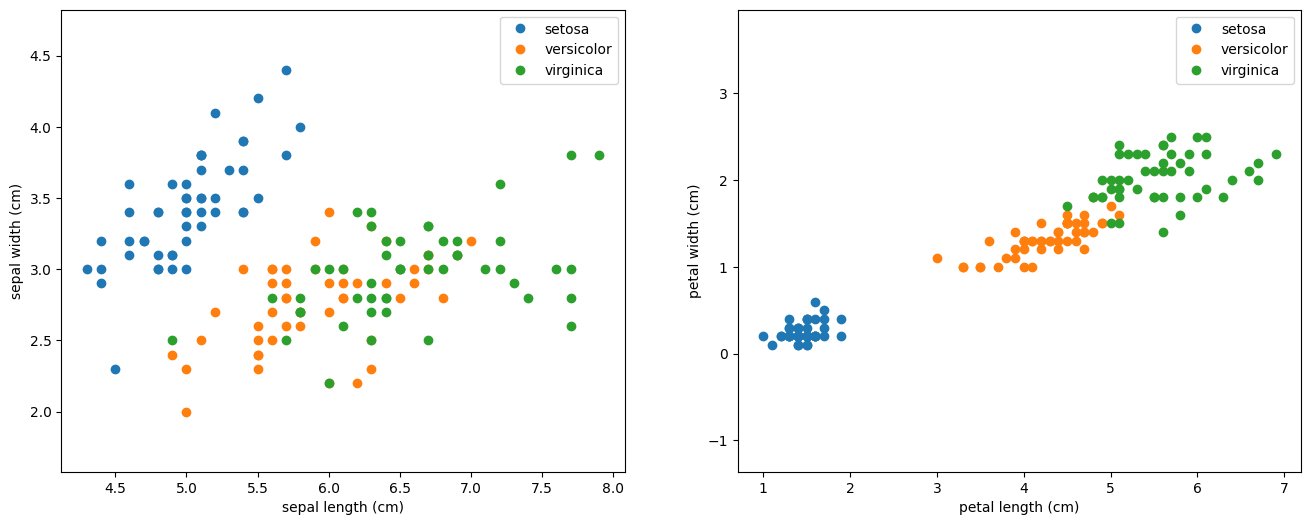

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 312.68it/s]


# Plot training progress

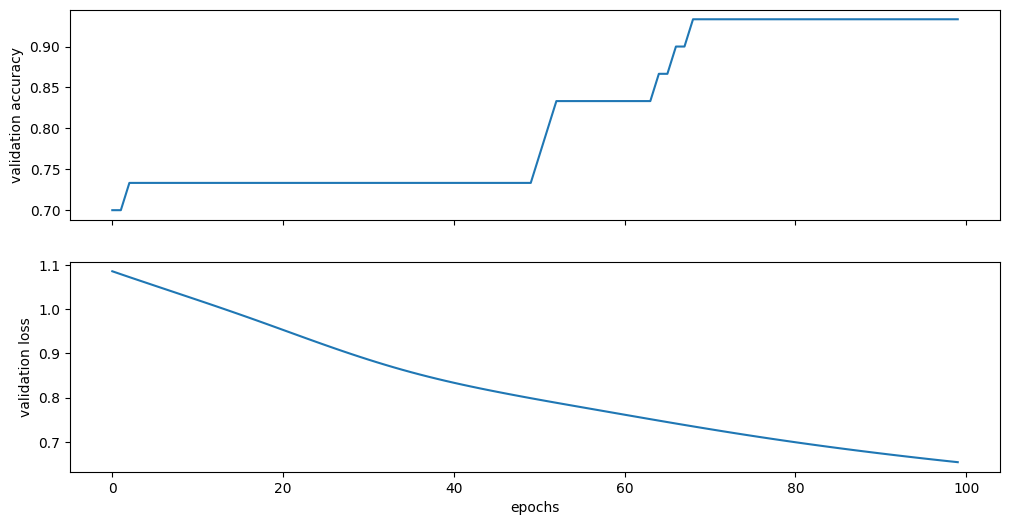

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

ANSWERS:

1. Absolutely! Modifying the number of hidden layers in a neural network can significantly impact its performance and behavior. The number of hidden layers is one of the key architectural choices in designing a neural network, alongside the number of neurons in each layer and the activation functions used.

Here's a brief overview of how changing the number of hidden layers can affect a neural network:

1. **Single Hidden Layer:** Networks with a single hidden layer are simpler and may struggle with learning complex patterns in data. However, they are computationally less expensive and may generalize better on simpler tasks.

2. **Multiple Hidden Layers:** Adding more hidden layers allows the network to learn increasingly complex representations of the data. Deep neural networks (those with many hidden layers) have been shown to excel at learning intricate features and patterns in large datasets, making them suitable for tasks like image recognition, natural language processing, and more.

3. **Deep vs. Shallow Networks:** Deep networks (those with multiple hidden layers) can potentially suffer from vanishing gradients or overfitting if not properly regularized or initialized. Shallow networks (with few hidden layers) may struggle to capture complex patterns. It's often a trade-off between depth and breadth of the network architecture.

4. **Model Complexity:** Increasing the number of hidden layers increases the model's capacity to learn intricate patterns but also increases computational complexity and the risk of overfitting. It's essential to balance model complexity with the available computational resources and the complexity of the problem being solved.

5. **Empirical Exploration:** Determining the optimal number of hidden layers often involves empirical exploration, experimenting with different architectures and hyperparameters, and evaluating performance on validation data. Techniques like cross-validation and grid search can aid in this process.

Overall, changing the number of hidden layers is a crucial aspect of designing neural network architectures and should be done thoughtfully based on the specific characteristics of the problem at hand and the available resources.

2. Certainly! Adjusting the number of neurons in the hidden layer(s) of a neural network is another important aspect of model architecture design. Here's how changing the number of neurons can impact the performance and behavior of a neural network:

1. **Fewer Neurons:** Using fewer neurons in the hidden layer(s) reduces the model's capacity to learn complex patterns in the data. This can lead to underfitting, where the model fails to capture important relationships in the data. However, it may also help prevent overfitting on smaller datasets or reduce computational complexity.

2. **More Neurons:** Increasing the number of neurons in the hidden layer(s) enhances the model's capacity to learn intricate features and relationships in the data. This can improve the model's performance on complex tasks and large datasets. However, too many neurons can lead to overfitting, where the model learns to memorize the training data rather than generalize to new, unseen data.

3. **Empirical Exploration:** Determining the optimal number of neurons often involves experimentation and empirical exploration. It's essential to monitor the model's performance on a validation dataset while varying the number of neurons to find the point where performance stabilizes or starts to degrade due to overfitting.

4. **Rule of Thumb:** There's no one-size-fits-all rule for determining the number of neurons in a hidden layer. However, a common approach is to start with a number of neurons roughly between the number of input and output neurons and then adjust based on experimentation and performance evaluation.

5. **Regularization Techniques:** To mitigate the risk of overfitting when using a large number of neurons, regularization techniques like dropout, L1/L2 regularization, or early stopping can be employed.

6. **Computational Resources:** The number of neurons also affects the computational resources required for training and inference. Larger numbers of neurons increase both memory and computation requirements.

In summary, changing the number of neurons in the hidden layer(s) is a crucial aspect of neural network architecture design and should be done carefully, considering the complexity of the problem, available data, computational resources, and desired model performance.

3. Certainly! Activation functions play a crucial role in neural networks by introducing non-linearities, enabling the network to learn complex mappings between inputs and outputs. Here are a few different activation functions commonly used in machine learning:

1. **ReLU (Rectified Linear Unit):** ReLU is one of the most popular activation functions due to its simplicity and effectiveness. It returns the input if it's positive and zero otherwise. Mathematically, it's defined as \( f(x) = \max(0, x) \).

2. **Sigmoid:** The sigmoid function squashes the input values between 0 and 1, which is useful for binary classification problems. It has a smooth S-shaped curve. Mathematically, it's defined as \( f(x) = \frac{1}{1 + e^{-x}} \).

3. **Tanh (Hyperbolic Tangent):** Tanh squashes the input values between -1 and 1, making it useful for classification tasks where the output is centered around zero. Mathematically, it's defined as \( f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} \).

4. **Leaky ReLU:** Leaky ReLU is a variant of ReLU that allows a small, non-zero gradient when the input is negative, which can help with the vanishing gradient problem. Mathematically, it's defined as \( f(x) = \max(\alpha x, x) \), where \( \alpha \) is a small constant (e.g., 0.01).

5. **Softmax:** Softmax is often used in the output layer of a neural network for multi-class classification problems. It squashes the outputs into a probability distribution over multiple classes, ensuring that the sum of the outputs is equal to 1. Mathematically, it's defined as \( f(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}} \), where \( N \) is the number of classes.

6. **Swish:** Swish is a relatively newer activation function that has shown promising results in some experiments. It's similar to ReLU but has a smoother gradient. Mathematically, it's defined as \( f(x) = x \cdot \sigma(x) \), where \( \sigma(x) \) is the sigmoid function.

These are just a few examples of activation functions, and there are many others to explore. The choice of activation function depends on the specific characteristics of the problem you're solving and often involves experimentation to find the one that works best for your particular application.